In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv('emails.csv')
print(df.head())
X = df.drop(columns=['Email No.', 'Prediction'])
y = df['Prediction']

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [13]:
print(df.columns)

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


In [15]:

from scipy.sparse import csr_matrix
# Convert feature matrix to sparse format
X_sparse = csr_matrix(X)

In [17]:
# 🔻 Dimensionality reduction using TruncatedSVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X_sparse)

In [18]:
# ✂️ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [19]:
# ✅ Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [20]:
# ✅ Train SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [21]:
# 📊 Evaluation
print("🔎 K-Nearest Neighbors Performance:")
print(classification_report(y_test, y_pred_knn))

print("🔎 Support Vector Machine Performance:")
print(classification_report(y_test, y_pred_svm))

🔎 K-Nearest Neighbors Performance:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       739
           1       0.72      0.82      0.77       296

    accuracy                           0.86      1035
   macro avg       0.82      0.85      0.83      1035
weighted avg       0.86      0.86      0.86      1035

🔎 Support Vector Machine Performance:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       739
           1       0.86      0.92      0.89       296

    accuracy                           0.93      1035
   macro avg       0.91      0.93      0.92      1035
weighted avg       0.94      0.93      0.93      1035



🔎 K-Nearest Neighbors Performance:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       739
           1       0.72      0.82      0.77       296

    accuracy                           0.86      1035
   macro avg       0.82      0.85      0.83      1035
weighted avg       0.86      0.86      0.86      1035

🔎 Support Vector Machine Performance:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       739
           1       0.86      0.92      0.89       296

    accuracy                           0.93      1035
   macro avg       0.91      0.93      0.92      1035
weighted avg       0.94      0.93      0.93      1035



C:\Users\sagar\AppData\Local\Temp\ipykernel_21352\435030720.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["KNN", "SVM"], y=[accuracy_knn, accuracy_svm], palette="viridis")


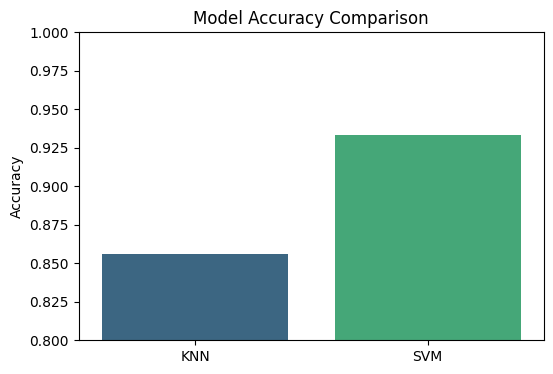

In [22]:
print("🔎 K-Nearest Neighbors Performance:")
print(classification_report(y_test, y_pred_knn))

print("🔎 Support Vector Machine Performance:")
print(classification_report(y_test, y_pred_svm))

# 📈 Accuracy Comparison
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.barplot(x=["KNN", "SVM"], y=[accuracy_knn, accuracy_svm], palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.show()